In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

In [8]:
import numpy as np
import scipy.interpolate as ip
import matplotlib.pyplot as plt

import sympy as sym
"""for pen plotting"""
# Initialiserer pen visning av uttrykkene
sym.init_printing()

# Plotteparametre for C% fC% store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 7), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

## Problem 2

In this problem, you are asked to estimate the Lebesgue constant for function interpolation. Given a set of nodes $x_0,\ldots x_n\in[a,b]$, the Lebesgue constant $\Lambda_n$ is defined as 

$$ \Lambda_n := \max_{x\in[a,b]} L(x) $$

where

$$ L(x) = \sum_{i=1}^n |L_{i,n}(x)|. $$

Here, $L_{i,n}(x)$ is the Lagrange polynomial number $i$, given by

$$ L_{i,n}(x) = \prod_{j\neq i} \frac{x-x_j}{x_i-x_j}. $$

Using the Lebesgue constant, we can obtain an upper bound for the interpolation error relative to the best interpolation error. Assume that $p$ is some interpolating polynomial and $p^\ast$ is the best interpolating polynomial. Then we have that

$$ \|p-f\| \leq (\Lambda_n+1) \|p^\ast-f\|. $$

Note that this holds for every norm $\|\cdot\|$.

**a)**

Write a function which computes $L(x)$, given a set of nodes $x_0,\ldots x_n$.

In [9]:
def L(x_vec, x_nodes): # x -> x_vec needs to be a vector for speed!!!
    N = len(x_nodes)
    L = np.zeros(len(x_vec))
    for i in range(N):
        index = np.zeros(N+1)
        index[i] = 1
        Li = ip.lagrange(x_nodes, index)
        L += np.abs(Li(x_vec))
    if len(L) == 1: # if x is a scalar
        return L[0]
    return L

We want to estimate $\Lambda_n$ for nodes on the interval $[-1,1]$. Spesifically we want to consider

- Uniformly distributed nodes:  $x_i = -1+2i/n, \ i=0,\ldots n$
- Chebyshev nodes: $x_i = \cos\left(\pi\frac{2i+1}{2n+2}\right), \ i=0,\ldots n$


**b)**

Plot $L(x)$ for $x\in[-1,1]$ and give an estimate for $\Lambda_n$ for $n=5,10,15,20$ for using 

- Uniformly distributed nodes.
- Chebyshev nodes.

What do you observe? Do you expect uniformly distributed nodes or Chebyshev nodes to give a better interpolating polynomial?

*Hint: When estimating $\Lambda_n$, you can construct a very fine grid of values of $x$'s, compute $L(x)$ for each $x$ and find the maximum of all values of $L(x)$.* 

*If you prefer, you may use the following template:*

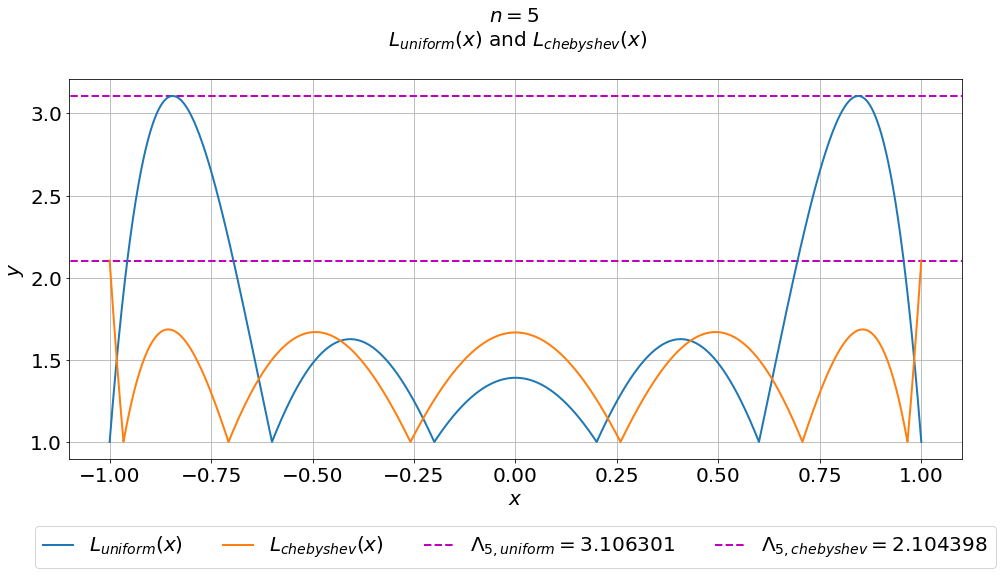

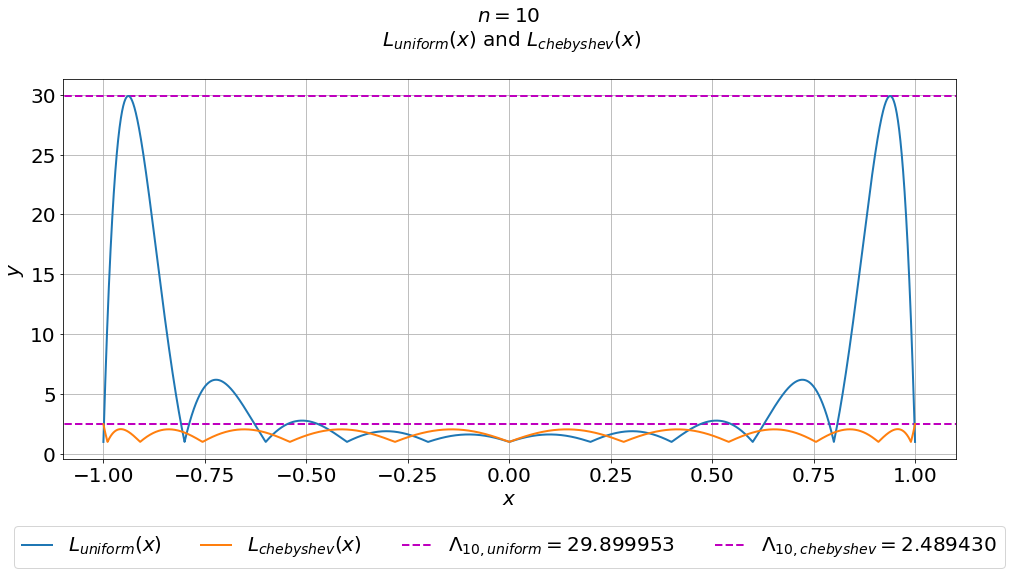

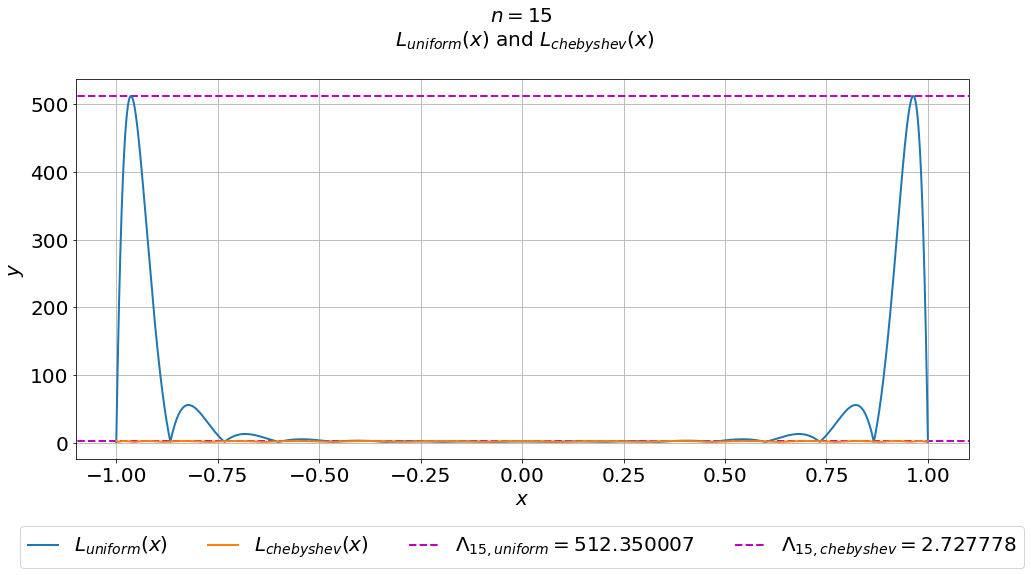

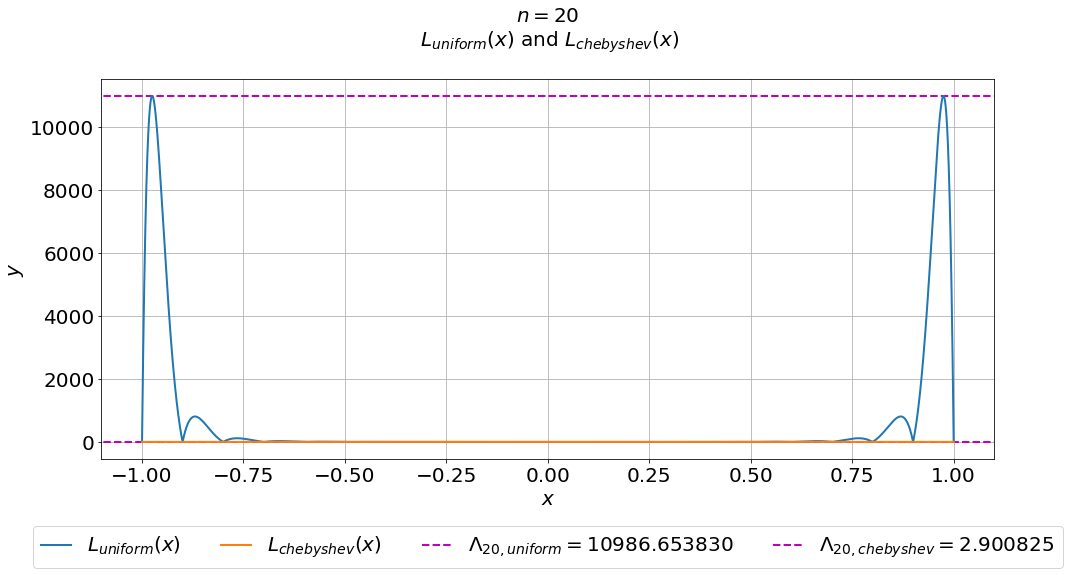

In [10]:
# Compute a fine grid of x's:
M = 10000
x_vec = np.linspace(-1,1,M)
n_list = np.array([5, 10, 15, 20])

for n in n_list:
    x_nodes_uniform = np.linspace(-1, 1, n+1)
    x_nodes_chebyshev = np.array([np.cos(np.pi * (2 * i + 1) / (2 * n +2)) for i in range(n+1)])
    
    
    L_uniform = L(x_vec, x_nodes_uniform)
    L_chebyshev = L(x_vec, x_nodes_chebyshev)
    # Lambda_n_estimate will now approximate the true value of Chebyshev's constant
    Lambda_n_estimate_uniform = np.max(L_uniform)
    Lambda_n_estimate_chebyshev = np.max(L_chebyshev)
    plt.figure()
    plt.title("$n = " + str(n) + "$ \n $L_{uniform}(x)$ and $L_{chebyshev}(x)$ \n")
    plt.hlines(Lambda_n_estimate_uniform, xmin=-1.2, xmax=1.2, color='m',linestyles='dashed',
              label="$\Lambda_{" + str(n) + ", uniform} = " +"{:.6f}".format(Lambda_n_estimate_uniform) +"$")
    plt.hlines(Lambda_n_estimate_chebyshev, xmin=-1.2, xmax=1.2, color='m',linestyles='dashed',
              label="$\Lambda_{" + str(n) + ", chebyshev} = " + "{:.6f}".format(Lambda_n_estimate_chebyshev) +"$")
    plt.plot(x_vec, L_uniform, label="$L_{uniform}(x)$")
    plt.plot(x_vec, L_chebyshev, label="$L_{chebyshev}(x)$")
    plt.xlim(-1.1, 1.1)
    plt.grid(True)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=6) 
    plt.show()
    

<font color ='blue'>
    Your comments here:
    
</font>

As $n$ gets bigger $\Lambda_n$  gets bigger, but $\Lambda_n$ is a lot bigger, and I mean a lot, for the uniformly distributed nodes than for the Chebyshev nodes. This is as I expected, because I expected that the Chebyshev nodes to give a better interpolating polynomial than the uniformly distributed nodes.
